In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [27]:
data = pd.read_csv('credit_risk_dataset.csv')


Name: Description 
- person_age: Age
- person_income: Annual Income
- personhomeownership: Home ownership
- personemplength: Employment length (in years)
- loan_intent: Loan intent
- loan_grade:	Loan grade
- loan_amnt:	Loan amount
- loanintrate:	Interest rate
- loanpercentincome: 	Percent income
- cbpersondefaultonfile: 	Historical default
- cbpresoncredhistlength:	Credit history length 
- loan_status: 	Loan status (0 is non default 1 is default) / Target

In [28]:
data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


ANALISIS EXPLORATORIO

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [30]:
data['loan_status'].value_counts()


0    25473
1     7108
Name: loan_status, dtype: int64

KeyboardInterrupt: 

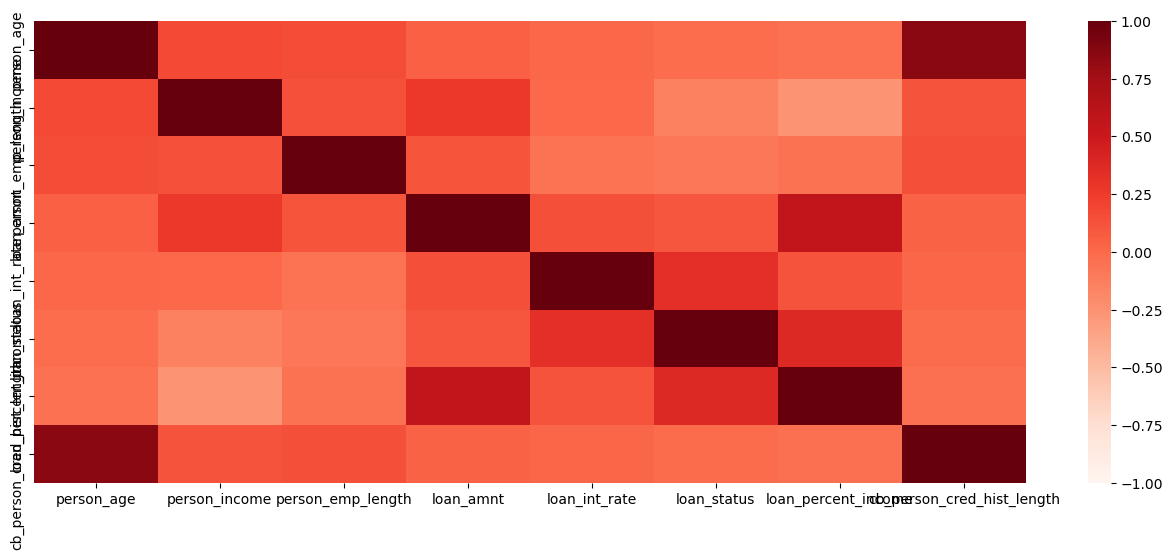

In [31]:
plt.figure(figsize=(16,6))
corr_heatmap = sns.heatmap(data.corr(), vmin= -1, vmax= 1, annot= True, cmap='Reds')
corr_heatmap.set_title('Correlation Features Heatmap')

In [ ]:
data.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [ ]:
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [ ]:
#Que hacemos con los nulls?
data= data.dropna()

In [ ]:
data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [ ]:
data = pd.get_dummies(data)

In [ ]:
data

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,22,59000,123.0,35000,16.02,1,0.59,3,0,0,...,0,0,0,0,1,0,0,0,0,1
1,21,9600,5.0,1000,11.14,0,0.10,2,0,0,...,0,0,1,0,0,0,0,0,1,0
2,25,9600,1.0,5500,12.87,1,0.57,3,1,0,...,0,0,0,1,0,0,0,0,1,0
3,23,65500,4.0,35000,15.23,1,0.53,2,0,0,...,0,0,0,1,0,0,0,0,1,0
4,24,54400,8.0,35000,14.27,1,0.55,4,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0,0.11,30,1,0,...,0,0,0,1,0,0,0,0,1,0
32577,54,120000,4.0,17625,7.49,0,0.15,19,1,0,...,0,1,0,0,0,0,0,0,1,0
32578,65,76000,3.0,35000,10.99,1,0.46,28,0,0,...,0,0,1,0,0,0,0,0,1,0
32579,56,150000,5.0,15000,11.48,0,0.10,26,1,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
x = data.drop('loan_status', axis=1)

In [ ]:
x.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,0.16,N,3


In [ ]:
y = data['loan_status']

In [ ]:
#Las clases están desbalanceadas, hay una mayoría considerable en la categoría 0. 
y.value_counts()

0    22435
1     6203
Name: loan_status, dtype: int64

In [ ]:
#Separamos el dataset en x e y, tmabién estratificamos con el objetivo es que las proporciones de datos
#se mantengan iguales tanto en train como test
x_train, x_test, y_train , y_test = train_test_split(x,y,stratify=y)

In [ ]:
#Se escalan los datos datos de X para sacarle las unidades, la escala se a partir del test y luego se aplica a train
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)

Entrenando el KNN y Regresion Logistica a partir de Gridsearch

In [ ]:
modelos = [LogisticRegression(),
         KNeighborsClassifier()]

In [ ]:
#Diccionario de hiperparámetros para cada modelo
params = [
    {'C':[1,10,100,1000],
    'penalty':['l1','l2']},
    {'n_neighbors': range(1,200), 
    'weights':['uniform','distance'],
    'p':[1,2,3]}
]

In [ ]:
folds= StratifiedKFold(n_splits=10,random_state=1,shuffle=True)

In [ ]:
grids = []
for i in range(len(modelos)):
    gs = GridSearchCV(estimator=modelos[i],param_grid=params[i],scoring='accuracy',cv=folds)
    print (gs)
    fit = gs.fit(x_train, y_train)
    grids.append(fit)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=1, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
             scoring='accuracy')


c:\Users\L1002052\Anaconda3\envs\DHenv\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\L1002052\Anaconda3\envs\DHenv\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\L1002052\Anaconda3\envs\DHenv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\L1002052\Anaconda3\envs\DHenv\lib\site-packages\sklearn\linear_model\_logistic.py

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=1, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 200), 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')


KeyboardInterrupt: 